## <span style="color:blue">**Problem Statement**:</style>


<span style="color:green;font-size:17px">**About Company:**</style>

<span style="font-size:14px;font-family:HelveticsNeue">Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.</style>


<span style="font-size:17px;color:green">**Problem:**</style>

<span style="font-size:14px;font-family:HeleveticsNeue">Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.</style>


<span style="color:blue">**Data Variable Description:** </style>

    * Loan_ID - Unique Loan ID
    * Gender - Male/ Female
    * Married - Applicant married (Y/N)
    * Dependents - Number of dependents
    * Education - Applicant Education (Graduate/ Under Graduate)
    * Self_Employed - Self employed (Y/N)
    * ApplicantIncome - Applicant income
    * CoapplicantIncome - Coapplicant income
    * LoanAmount - Loan amount in thousands
    * Loan_Amount_Term - Term of loan in months
    * Credit_History - credit history meets guidelines
    * Property_Area - Urban/ Semi Urban/ Rural
    * Loan_Status - Loan approved (Y/N)

    * Volume of data: 614 
    * Target Variable: Loan_Status

In [2]:
import pandas as pd
import h2o
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 days 10 hours 56 mins
H2O cluster version:,3.14.0.1
H2O cluster version age:,"1 year, 4 months and 15 days !!!"
H2O cluster name:,H2O_from_python_kodamsri_w5m92i
H2O cluster total nodes:,1
H2O cluster free memory:,3.349 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [4]:
data=h2o.import_file("./Data/train_loan_prediction.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
data.summary()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
type,string,enum,enum,int,enum,enum,int,real,int,int,int,enum,enum
mins,NaN,,,0.0,,,150.0,0.0,9.0,12.0,0.0,,
mean,NaN,,,0.554744525547,,,5403.45928339,1621.24579803,146.412162162,342.0,0.84219858156,,
maxs,NaN,,,2.0,,,81000.0,41667.0,700.0,480.0,1.0,,
sigma,NaN,,,0.785328986167,,,6109.04167339,2926.24836922,85.5873252357,65.1204098546,0.364878319236,,
zeros,0,,,345,,,0,273,0,0,89,,
missing,0,13,3,66,0,32,0,0,22,14,50,0,0
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,nan,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


<span style="font-size=12px;font-family:Arial">This data has no missing values for below columns:</style>
    * ApplicantIncome 
    * CoappllicantIncome
    * Property_Area

In [24]:
data.shape

(614, 13)

In [36]:
data.as_data_frame()['Loan_Status'].value_counts()
data['Loan_Status']=data['Loan_Status'].asfactor()

In [56]:
data[['Loan_Status','ApplicantIncome','CoapplicantIncome','Property_Area']].group_by(by=['Loan_Status','Property_Area']).min().max().mean().get_frame()

Loan_Status,Property_Area,max_CoapplicantIncome,mean_ApplicantIncome,mean_CoapplicantIncome,min_ApplicantIncome,max_ApplicantIncome,min_CoapplicantIncome
N,Rural,5302,6497.52,1436.51,150,81000,0
N,Semiurban,11300,5296.85,1563.2,1500,33846,0
N,Urban,41667,4511.42,2565.32,416,18333,0
Y,Rural,8333,4962.29,1776.66,645,23803,0
Y,Semiurban,20000,5290.88,1507.14,210,39999,0
Y,Urban,8106,5858.33,1275.91,1299,63337,0


In [57]:
data_pd=data.as_data_frame()

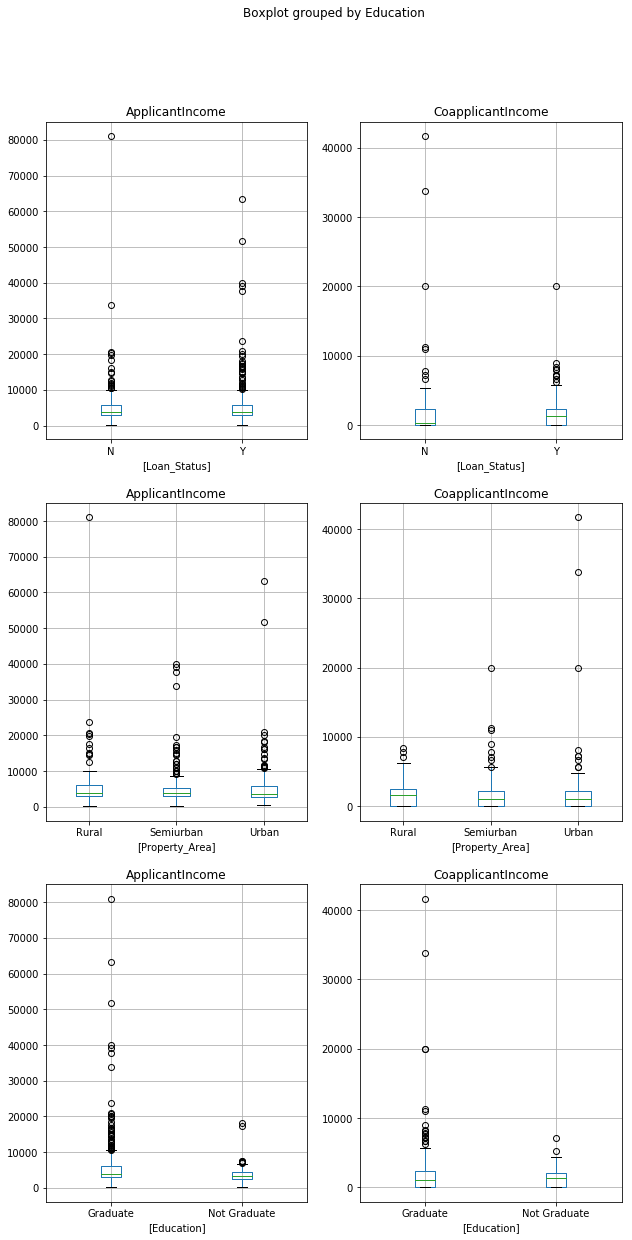

In [74]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))= plt.subplots(nrows=3,ncols=2,figsize=(10,20))
data_pd[['Loan_Status','ApplicantIncome']].boxplot(by='Loan_Status',ax=ax1)
data_pd[['Loan_Status','CoapplicantIncome']].boxplot(by='Loan_Status',ax=ax2)
data_pd[['Property_Area','ApplicantIncome']].boxplot(by='Property_Area',ax=ax3)
data_pd[['Property_Area','CoapplicantIncome']].boxplot(by='Property_Area',ax=ax4)
data_pd[['Education','ApplicantIncome']].boxplot(by='Education',ax=ax5)
data_pd[['Education','CoapplicantIncome']].boxplot(by='Education',ax=ax6)

In [69]:
data_pd[data_pd['ApplicantIncome']<data_pd['CoapplicantIncome']]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
12,LP001028,Male,Yes,2.0,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
13,LP001029,Male,No,0.0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
19,LP001041,Male,Yes,0.0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
38,LP001114,Male,No,0.0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
48,LP001146,Female,Yes,0.0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
60,LP001205,Male,Yes,0.0,Graduate,No,2500,3796.0,120.0,360.0,1.0,Urban,Y
62,LP001207,Male,Yes,0.0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N
76,LP001256,Male,No,0.0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban,N
77,LP001259,Male,Yes,1.0,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N
78,LP001263,Male,Yes,NaN,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban,N


In [70]:
def sent_perc_95(data_train,list_num):
    for t in list_num:
        pert95=np.percentile(data_train[t],95)
        print(t,pert95)
        data_train[t] =[pert95 if x>pert95 else x for x in data_train[t].values] 
    return data_train

#### Missing value treatment:

In [75]:
data_pd['Self_Employed']=data_pd['Self_Employed'].fillna('No')

In [84]:
data_pd[(data_pd['CoapplicantIncome']!=0) &(data_pd['Married'].isna()==True)].loc[:,'Married']='Yes'
data_pd[(data_pd['CoapplicantIncome']==0) &(data_pd['Married'].isna()==True)].loc[:,'Married']='No'

In [89]:
data_pd[data_pd['Married'].isna()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [87]:
data_pd[(data_pd['CoapplicantIncome']!=0) &(data_pd['Married'].isna()==True)].fillna('Yes')
data_pd[(data_pd['CoapplicantIncome']==0) &(data_pd['Married'].isna()==True)].fillna('No')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
228,LP001760,Male,No,No,Graduate,No,4758,0.0,158,480.0,1.0,Semiurban,Y
435,LP002393,Female,No,No,Graduate,No,10047,0.0,No,240.0,1.0,Semiurban,Y
